## Optimization concepts

1. Company environmental subsidies:

$$
\log(ci + xi)
$$

Function to maximize:

$$
\sum_{i=1}^{N} \log(ci + xi)
$$

Optimal solution:
$$
x_i^* = max(0, \frac{1}{\lambda} - ci)
$$


1.a) (2 points) Explain (in your own words and max 3 lines) what you understand from the optimal solution x∗i . Hint: Discuss the edge case(s) and compare the budget each department receives.

We can base our analysis taking the following into account:

$$
x^*_i =
\begin{cases}
\frac{1}{\lambda} - c_i & \text{if } \frac{1}{\lambda} - c_i > 0 \\
0 & \text{otherwise}

\end{cases}
$$

From this condition, we can infer that the amount of subsidy a company receives is based on the parameter $\lambda$. This means that departments with a carbon footprint coefficient $c_i$ less than $\frac{1}{\lambda}$ will receive a positive budget allocation and thus maximize the subsidy. On the contrary, departments with $c_i \geq \frac{1}{\lambda}$ will receive no budget and get a total subsidy of 0. With this in mind, the budget is distributed more to departments with lower ci, maximizing the total subsidy return.

1.b) (3 points) Assuming the total available budget Bt = 10, the total number of departments N = 3, and the carbon footprint coefficient of each department c1 = 4, c2 = 8, c3 = 2, use the binary search method to find the λ that satisfies the budget constraint, i.e., x1 +x2 +x3 = Bt. In addition to providing the Python code, you are required to perform 2 iterations by hand. Note: Use 0.01 and 2 as initial left and right bounds, respectively, in the binary search algorithm.

### By hand:

Iteration 1:

We begin with the initial interval:

$$
\text{left} = 0.01 \\[1em]
\text{right} = 2 \\[1em]
\text{middle} = \frac{0.01 + 2}{2} = 1.005
$$

Next, we compute \( B_t \) using the middle value:

$$
B_t = \frac{1}{1.005} \cdot 4 + \frac{1}{1.005} \cdot 8 + \frac{1}{1.005} \cdot 2 = -11.01
$$

Since:

$$
-11.01 < 10
$$

This indicates that our current estimate overshoots the target from the left. Therefore, to move closer to the target from the left side, we update the interval by narrowing it:

$$
\text{right} = \text{middle} = 1.005
$$

Iteration 2:

We update our interval as follows:

$$
\text{left} = 0.01 \\[1em]
\text{right} = 1.005 \\[1em]
\text{middle} = \frac{0.01 + 1.005}{2} = 0.5075 \\[1.5em]

B_t = \frac{1}{0.5075} \cdot 4 + \frac{1}{0.5075} \cdot 8 + \frac{1}{0.5075} \cdot 2 = -8.088 \\[1.5em]

\text{Since } -8.088 < 10, \text{ we are still below the target.} \\[1em]
\text{To approach the target from the left, we update the interval:} \\[1em]

\text{right} = \text{middle} = 0.5075
$$

### Solution:

In [10]:
def calculate_sum(lambda_var):

    c1 = 4
    c2 = 8
    c3 = 2

    x1 = ((1/lambda_var) - c1)
    x2 = ((1/lambda_var) - c2) 
    x3 = ((1/lambda_var) - c3) 

    value = x1 + x2 + x3
    return(value)  


def binary_search(tolerance, right, left, target):

    while (right - left) > tolerance:

        mid_val = (left + right)/2
        calculate_val = calculate_sum(mid_val)    

        #print(f'left {left}')
        #print(f'right {right}')
        #print(f'value {calculate_val}')
        #print(" ")
        

        if calculate_val > target:
            left = mid_val 
        else:
            right= mid_val 

    return mid_val
    
tolerance = 0.0001
left = 0.01
right = 2
target = 10

optimal_lambda = binary_search(tolerance, right, left, target)
print(f'Optimal lambda: {round(optimal_lambda,3)}')
print(f'Result: { round(calculate_sum(optimal_lambda),1)}')

Optimal lambda: 0.125
Result: 10.0



2. Consider the following optimization problem:

$$

max:  \frac{5}{3} ln(x_1) − \frac{4}{3} x_1 + \frac{7}{4} ln(x_2) − \frac{1}{4}x_2 

$$

subject to:
$$

(x_1 - 5)^2 + (x_2 - 7)^2 <= 3, x_1 >0, x_2>0
$$


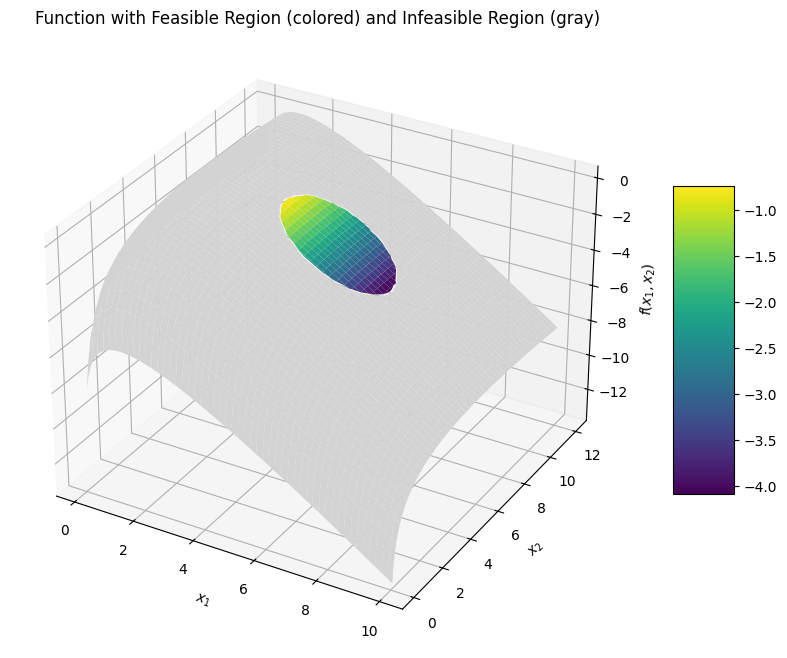

In [7]:
#THIS CODE WAS DONE WITH THE HELP OF CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Define the function
def f(x1, x2):
    return (5/3) * np.log(x1) - (4/3) * x1 + (7/4) * np.log(x2) - (1/4) * x2

# Create a grid of x1 and x2 values
x1 = np.linspace(0.1, 10, 200)
x2 = np.linspace(0.1, 12, 200)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate the function
Z = f(X1, X2)

# Define the constraint mask
constraint_mask = ((X1 - 5)**2 + (X2 - 7)**2) <= 3

# Create two surfaces: one for feasible region, one for outside
Z_feasible = np.where(constraint_mask, Z, np.nan)
Z_outside  = np.where(~constraint_mask, Z, np.nan)

# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot feasible region with viridis
surf1 = ax.plot_surface(X1, X2, Z_feasible, cmap='viridis', edgecolor='none')

# Plot infeasible region in gray
gray_cmap = ListedColormap(['lightgray'])
surf2 = ax.plot_surface(X1, X2, Z_outside, cmap=gray_cmap, edgecolor='none')

# Axes and labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Function with Feasible Region (colored) and Infeasible Region (gray)')

# Colorbar for feasible region only
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.show()

2.a) (3 points) Explain (in your own words and max 2 lines) what a convex set is. Is the set
constructed by the constraints in the above optimization problem convex? Why?

A convex set is a set where, if you draw a straight line between any two points within the set, the entire line segment lies completely inside the set.
For example, a set defined by a circular constraint (like the one shown in the graph above) is convex because any line between two points inside the circle remains inside the circle.
Optimizing a function over a convex set is important because it ensures that if a solution exists, we can efficiently find the global minimum (or maximum) without getting stuck in local optima.

2.b) (3 points) Modify one of the codes you saw in the lecture demo to solve the above optimization problem. Plot the contours of the function, the feasible region, and the steps of the algorithm in a single plot.

In [19]:
### Using projected gradient descent

def f(x: float, y: float) -> float:
    
    return (5/3) * np.log(x) - (4/3) * x + (7/4) * np.log(y) - (1/4) * y

def grad_x(x: float) -> float:
    
    return (5/3) * (1/x) - (4/3) 

def grad_y(y: float) -> float:

    return (7/4) * (1/y) - (1/4)

radius: float = 3

def project_onto_circle(x: float, y: float, radius: float) -> tuple[float, float]:
    
    center_x, center_y = 5, 7
    radius = np.sqrt(radius)

    #distance from center
    dx = x - center_x
    dy = y - center_y
    distance = np.sqrt(dx**2 + dy**2)

    if distance <= radius:
        return x, y

    scale = radius / distance
    x_proj = center_x + dx * scale
    y_proj = center_y + dy * scale

    return x_proj, y_proj

def pgd_circle(max_iters: int, alpha: float, tol: float) -> tuple[float, float, list[tuple[float, float]]]:
    """Performs projected gradient descent constrained within a circle.

    Args:
        max_iters (int): Maximum number of iterations.
        alpha (float): Step size for gradient descent.
        tol (float): Convergence tolerance.

    Returns:
        tuple[float, float, list[tuple[float, float]]]:
            - The optimal x-coordinate.
            - The optimal y-coordinate.
            - A list of all (x, y) points visited during optimization.
    """
    x, y = 8, 8  # Initialize with an infeasible point outside the circle
    history = [(x, y)]

    for k in range(max_iters):
        # Gradient step
        x_temp = x + alpha * grad_x(x)
        y_temp = y + alpha * grad_y(y)

        # Projection step
        if (x_temp - 5)**2 + (y_temp - 7)**2 <= radius:
            x_new, y_new = x_temp, y_temp
        else:
            x_new, y_new = project_onto_circle(x_temp, y_temp, radius)

        # Check convergence
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            x, y = x_new, y_new
            history.append((x, y))
            print(f"Iter {k}: x = {x:.4f}, y = {y:.4f}, f(x,y) = {f(x, y):.4f}, Constraint: {(x-5)**2 + (y-7)**2 <= radius}")
            print(f"Converged at iteration {k}")
            break

        x, y = x_new, y_new
        history.append((x, y))
        print(f"Iter {k}: x = {x:.4f}, y = {y:.4f}, f(x,y) = {f(x, y):.4f}, Constraint: {(x-5)**2 + (y-7)**2 <= radius}")

    return x, y, history

# Run PGD
x_opt, y_opt, history = pgd_circle(max_iters=1000, alpha=0.1, tol=1e-3)
print(f"Optimal solution: x* = {x_opt:.4f}, y* = {y_opt:.4f}")
print(f"Objective value: {f(x_opt, y_opt):.4f}")
print(f"Constraint check: {(x_opt-5)**2 + (y_opt-4)**2 <= 3}")
print(f"Constraint Value: {(x_opt-5)**2 + (y_opt-4)**2}")

Iter 0: x = 6.6372, y = 7.5652, f(x,y) = -4.0452, Constraint: False
Iter 1: x = 6.5290, y = 7.5634, f(x,y) = -3.9283, Constraint: True
Iter 2: x = 6.4212, y = 7.5615, f(x,y) = -3.8123, Constraint: True
Iter 3: x = 6.3138, y = 7.5596, f(x,y) = -3.6972, Constraint: True
Iter 4: x = 6.2069, y = 7.5578, f(x,y) = -3.5830, Constraint: True
Iter 5: x = 6.1004, y = 7.5560, f(x,y) = -3.4698, Constraint: True
Iter 6: x = 5.9944, y = 7.5541, f(x,y) = -3.3577, Constraint: True
Iter 7: x = 5.8889, y = 7.5523, f(x,y) = -3.2465, Constraint: True
Iter 8: x = 5.7838, y = 7.5504, f(x,y) = -3.1365, Constraint: True
Iter 9: x = 5.6793, y = 7.5486, f(x,y) = -3.0275, Constraint: True
Iter 10: x = 5.5753, y = 7.5468, f(x,y) = -2.9196, Constraint: True
Iter 11: x = 5.4719, y = 7.5450, f(x,y) = -2.8128, Constraint: True
Iter 12: x = 5.3690, y = 7.5432, f(x,y) = -2.7073, Constraint: True
Iter 13: x = 5.2667, y = 7.5414, f(x,y) = -2.6029, Constraint: True
Iter 14: x = 5.1650, y = 7.5396, f(x,y) = -2.4998, Constr

/var/folders/_m/yzl8twvn45zbf_rk8q3h5wl80000gn/T/ipykernel_40502/3825467022.py:5: RuntimeWarning: invalid value encountered in log
  return (5/3) * np.log(x) - (4/3) * x + (7/4) * np.log(y) - (1/4) * y


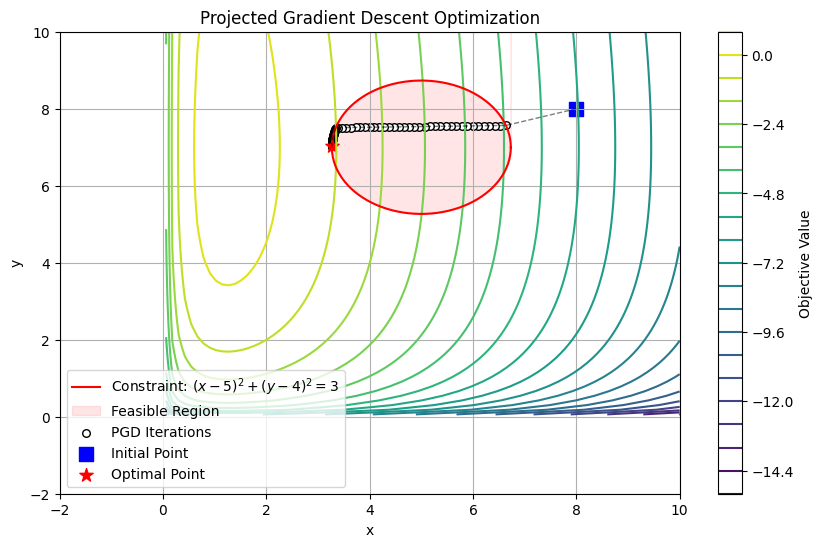

In [20]:
# Create contour plot
limit_low = 2
limit_up = 10
x_vals = np.linspace(-limit_low, limit_up, 100)
y_vals = np.linspace(-limit_low, limit_up, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(10, 6))

# Plot contours
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contours, label='Objective Value')

# Plot constraint boundary (2x + 3y = 10)
'''
constraint_x = np.linspace(-limit_low, limit_up, 100)
constraint_y = (10 - 2 * constraint_x) / 3
plt.plot(constraint_x, constraint_y, 'r-', label='Constraint: 2x + 3y = 10')

'''
theta = np.linspace(0, 2*np.pi, 100)
circle_x = 5 + np.sqrt(3) * np.cos(theta)
circle_y = 7 + np.sqrt(3) * np.sin(theta)
plt.plot(circle_x, circle_y, 'r-', label='Constraint: $(x-5)^2 + (y-4)^2 = 3$')


# Shade feasible region (2x + 3y >= 10)
plt.fill_between(circle_x, circle_y, limit_up, color='red', alpha=0.1, label='Feasible Region')

# Plot PGD iterations
x_hist, y_hist = zip(*history)
plt.scatter(x_hist, y_hist, c='white', s=30, edgecolors='black', label='PGD Iterations')
plt.plot(x_hist, y_hist, 'k--', lw=1, alpha=0.5)

# Mark initial and optimal points
plt.scatter(x_hist[0], y_hist[0], c='blue', s=100, label='Initial Point', marker='s')
plt.scatter(x_opt, y_opt, c='red', s=100, label='Optimal Point', marker='*')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Projected Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.xlim(-limit_low, limit_up)
plt.ylim(-limit_low, limit_up)
plt.show()


2.c) (2 points) Which algorithm did you choose, full Projected Gradient Descent (PGD) or Alternating Optimization along with PGD (AO-PGD)? Why?

In this case, we choose **Projected Gradient Descent (PGD)** because it is well-suited for optimizing a function over a constrained domain. When the optimization step leads to values outside the feasible region, PGD projects them back onto the constraint set.

**Alternating Optimization with PGD (AO-PGD)** is typically used when the variables are *not coupled* in the constraints and can be optimized separately in blocks. In our case, the constraint

$$
(x_1 - 5)^2 + (x_2 - 7)^2 \leq 3
$$

couples both variables, so PGD is more appropriate. AO-PGD is generally more effective when constraints are separable, such as

$$
x^2 \geq 2 \quad \text{and} \quad y \geq 3
$$

where variables can be optimized independently.

2.d) (2 points) Write down the steps you took (max 3 lines) to obtain the projection function for PGD. Explain the logic behind each step.